In [5]:
import pandas as pd

# URL del archivo JSON en GitHub (versión cruda)
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Leer los datos desde la URL y convertirlos en un DataFrame
df = pd.read_json(url)

# Mostrar las primeras filas
df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


## **Análisis Básico:**

In [6]:
# Ver el nombre de las columnas
print("Columnas del DataFrame:")
print(df.columns.tolist())

# Ver tipos de datos
print("\nTipos de datos de cada columna:")
print(df.dtypes)

# Dimensiones del dataset
print("\nDimensiones del DataFrame:", df.shape)



Columnas del DataFrame:
['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

Tipos de datos de cada columna:
customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

Dimensiones del DataFrame: (7267, 6)


## Normalización de Datos

In [7]:
# Copia del DataFrame original para trabajar
df_flat = df.copy()

# Expandir cada columna anidada y unirla al DataFrame
customer_df = pd.json_normalize(df_flat['customer'])
phone_df = pd.json_normalize(df_flat['phone'])
internet_df = pd.json_normalize(df_flat['internet'])
account_df = pd.json_normalize(df_flat['account'])

# Unir todas las columnas en un solo DataFrame plano
df_final = pd.concat([df_flat[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# Mostrar la estructura del nuevo DataFrame
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


#Valores Nulos

In [8]:
# Paso 1: Verificar valores nulos
print("Valores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


#Valores Duplicados

In [9]:
# Paso 2: Verificar duplicados
# Mover la verificación de duplicados después de aplanar el DataFrame
print("Número de filas duplicadas:", df_final.duplicated().sum())


Número de filas duplicadas: 0


#Valores Unicos en 'Churn'


In [10]:
# Paso 3: Valores únicos en la columna 'Churn'
print("Valores únicos en 'Churn':", df['Churn'].unique())


Valores únicos en 'Churn': ['No' 'Yes' '']


In [11]:
# Paso 4: Expandir la columna 'customer' para ver datos internos
customer_expanded = pd.json_normalize(df['customer'])

# Ver los valores únicos de 'gender'
print("Valores únicos de 'gender':", customer_expanded['gender'].unique())


Valores únicos de 'gender': ['Female' 'Male']


In [12]:
# Convertir a minúsculas para uniformizar
df['Churn'] = df['Churn'].str.lower()


In [13]:
# Eliminar espacios extra o reemplazar strings inconsistentes
df['Churn'] = df['Churn'].str.strip()


In [14]:
# Verificar valores nulos
print(df.isnull().sum())

# Ejemplo de llenado o eliminación si fuera necesario:
df = df.dropna()  # si decides eliminarlos
# o
# df['columna'] = df['columna'].fillna("desconocido")  # si decides imputarlos - Esta línea causaba el error KeyError porque 'columna' no existe.


customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [15]:
# Verificar valores nulos
print(df.isnull().sum())

# Ejemplo de llenado o eliminación si fuera necesario:
df = df.dropna()  # si decides eliminarlos
# o
# df['columna'] = df['columna'].fillna("desconocido")  # si decides imputarlos - Esta línea causaba el error KeyError porque 'columna' no existe.

# Eliminar duplicados si los hay
# Aplicar drop_duplicates al DataFrame aplanado
df_final = df_final.drop_duplicates()


customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


In [16]:
# Eliminar duplicados si los hay
# Aplicar drop_duplicates al DataFrame aplanado
df_final = df_final.drop_duplicates()

# Eliminar duplicados si los hay
# df = df.drop_duplicates() # Esta línea es innecesaria y causa el error


In [17]:
# Crear columna 'Cuentas_Diarias' a partir de 'MonthlyCharges'
df['Cuentas_Diarias'] = df['account'].apply(lambda x: x['MonthlyCharges'] / 30 if 'MonthlyCharges' in x else None)

# Verificar
df[['account', 'Cuentas_Diarias']].head()




,account,Cuentas_Diarias
0,"{'Contract': 'One year', 'PaperlessBilling': '...",None
1,"{'Contract': 'Month-to-month', 'PaperlessBilli...",None
2,"{'Contract': 'Month-to-month', 'PaperlessBilli...",None
3,"{'Contract': 'Month-to-month', 'PaperlessBilli...",None
4,"{'Contract': 'Month-to-month', 'PaperlessBilli...",None


In [18]:
# Convertir valores "Sí"/"No" en columnas relevantes a 1/0
df_final['Churn'] = df_final['Churn'].replace({'Sí': 1, 'No': 0})


In [19]:
# Ejemplo de renombrado
df_final = df_final.rename(columns={
    'Cuentas_Diarias': 'daily_charges',
    'Churn': 'cancelled'
})


In [20]:
# Ejemplo de conversión a minúsculas en una columna (aplicado a 'gender')
# df_final['customer'] = df_final['customer'].str.lower() # Esta línea causaba el error
df_final['gender'] = df_final['gender'].str.lower()

In [21]:
# Lista de columnas con respuestas tipo Yes/No
cols_binarias = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
                 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                 'StreamingTV', 'StreamingMovies', 'cancelled']

# Convertir Yes -> 1 y No -> 0
for col in cols_binarias:
    df_final[col] = df_final[col].replace({'Yes': 1, 'No': 0})


/tmp/ipython-input-21-672510288.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_final[col] = df_final[col].replace({'Yes': 1, 'No': 0})


In [34]:
df_final.head()


,customerID,cancelled,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,0,female,0,1,1,9,1,No,DSL,...,1,0,1,1,0,One year,1,Mailed check,65.6,593.3
1,0003-MKNFE,0,male,0,0,0,9,1,Yes,DSL,...,0,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4
2,0004-TLHLJ,1,male,0,0,0,4,1,No,Fiber optic,...,0,1,0,0,0,Month-to-month,1,Electronic check,73.9,280.85
3,0011-IGKFF,1,male,1,1,0,13,1,No,Fiber optic,...,1,1,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,female,1,1,0,3,1,No,Fiber optic,...,0,0,1,1,0,Month-to-month,1,Mailed check,83.9,267.4


In [22]:
# Análisis descriptivo de columnas numéricas
print("Análisis descriptivo de columnas numéricas:")
print(df_final.describe())


Análisis descriptivo de columnas numéricas:
       SeniorCitizen      Partner   Dependents       tenure  PhoneService  \
count    7267.000000  7267.000000  7267.000000  7267.000000   7267.000000   
mean        0.162653     0.484106     0.300124    32.346498      0.902711   
std         0.369074     0.499782     0.458343    24.571773      0.296371   
min         0.000000     0.000000     0.000000     0.000000      0.000000   
25%         0.000000     0.000000     0.000000     9.000000      1.000000   
50%         0.000000     0.000000     0.000000    29.000000      1.000000   
75%         0.000000     1.000000     1.000000    55.000000      1.000000   
max         1.000000     1.000000     1.000000    72.000000      1.000000   

       PaperlessBilling  Charges.Monthly  
count       7267.000000      7267.000000  
mean           0.593230        64.720098  
std            0.491265        30.129572  
min            0.000000        18.250000  
25%            0.000000        35.425000  
50% 

In [23]:
# Análisis descriptivo general (incluye categóricas si se usa include='all')
print("Análisis descriptivo de todas las columnas:")
print(df_final.describe(include='all'))


Análisis descriptivo de todas las columnas:
        customerID  cancelled gender  SeniorCitizen      Partner   Dependents  \
count         7267     7267.0   7267    7267.000000  7267.000000  7267.000000   
unique        7267        3.0      2            NaN          NaN          NaN   
top     9995-HOTOH        0.0   male            NaN          NaN          NaN   
freq             1     5174.0   3675            NaN          NaN          NaN   
mean           NaN        NaN    NaN       0.162653     0.484106     0.300124   
std            NaN        NaN    NaN       0.369074     0.499782     0.458343   
min            NaN        NaN    NaN       0.000000     0.000000     0.000000   
25%            NaN        NaN    NaN       0.000000     0.000000     0.000000   
50%            NaN        NaN    NaN       0.000000     0.000000     0.000000   
75%            NaN        NaN    NaN       0.000000     1.000000     1.000000   
max            NaN        NaN    NaN       1.000000     1.000000 

In [24]:
print("Valores nulos por columna:")
print(df_final.isnull().sum())


Valores nulos por columna:
customerID          0
cancelled           0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64


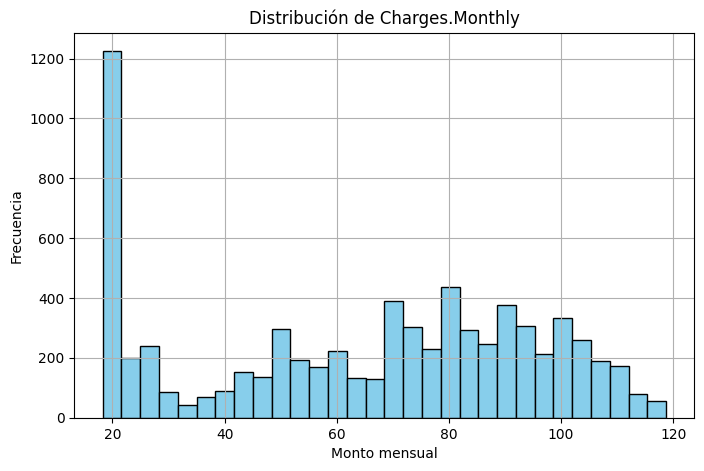

In [25]:
import matplotlib.pyplot as plt

# Histograma con Matplotlib
plt.figure(figsize=(8,5))
plt.hist(df_final['Charges.Monthly'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribución de Charges.Monthly')
plt.xlabel('Monto mensual')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


Valores únicos en 'cancelled' después del reemplazo: [0 1 '']
Valores únicos en 'cancelled' antes del gráfico: [0 1]


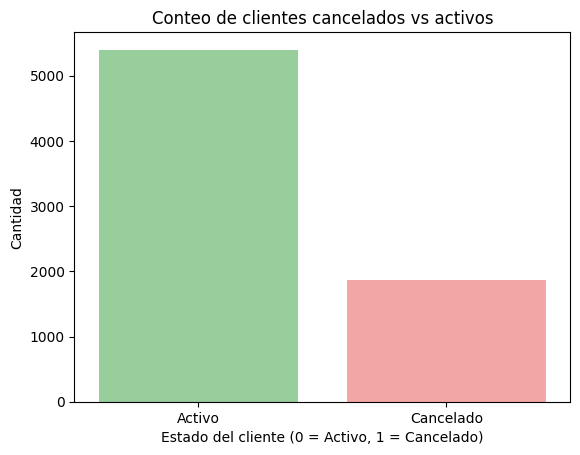

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegurarse de que 'cancelled' tiene solo dos valores: 0 y 1
df_final['cancelled'] = df_final['cancelled'].replace({'Sí': 1, 'No': 0, 'Yes': 1, 'No': 0}) # Añadir 'Sí' y 'No' al reemplazo si aún existen

# Verificar valores únicos en la columna 'cancelled' después del reemplazo
print("Valores únicos en 'cancelled' después del reemplazo:", df_final['cancelled'].unique())

# Manejar valores no convertibles.
# Si hay '', NaN, u otros valores, decide cómo tratarlos.
# Por ejemplo, llenar los valores nulos o vacíos con 0 antes de la conversión a int:
df_final['cancelled'] = df_final['cancelled'].fillna(0)
# Si después de fillna hay otros valores que no sean numéricos (0, 1, etc.) o strings convertibles,
# tendrás que investigarlos basándote en la salida de .unique() de arriba.
# Por ahora, intentamos convertir a tipo numérico float primero para manejar posibles NaNs que fillna(0) no haya atrapado,
# y luego a int. Esto es una forma más robusta si hay valores que no son directamente 'Yes'/'No'.
try:
    df_final['cancelled'] = pd.to_numeric(df_final['cancelled'], errors='coerce') # Intenta convertir a numérico, convierte errores a NaN
    df_final['cancelled'] = df_final['cancelled'].fillna(0).astype(int) # Llena NaN con 0 y convierte a int
except ValueError as e:
    print(f"Aún hay valores no convertibles a int después de manejar NaNs: {e}")
    # Aquí podrías inspeccionar df_final['cancelled'].unique() de nuevo para ver qué quedó

# Verifica que solo hay 0 y 1
print("Valores únicos en 'cancelled' antes del gráfico:", df_final['cancelled'].unique())

# Gráfico limpio usando hue
sns.countplot(data=df_final, x='cancelled', hue='cancelled', palette={0: "#8fd694", 1: "#ff9999"}, legend=False)

plt.title("Conteo de clientes cancelados vs activos")
plt.xlabel("Estado del cliente (0 = Activo, 1 = Cancelado)")
plt.ylabel("Cantidad")
plt.xticks([0, 1], ['Activo', 'Cancelado'])
plt.show()




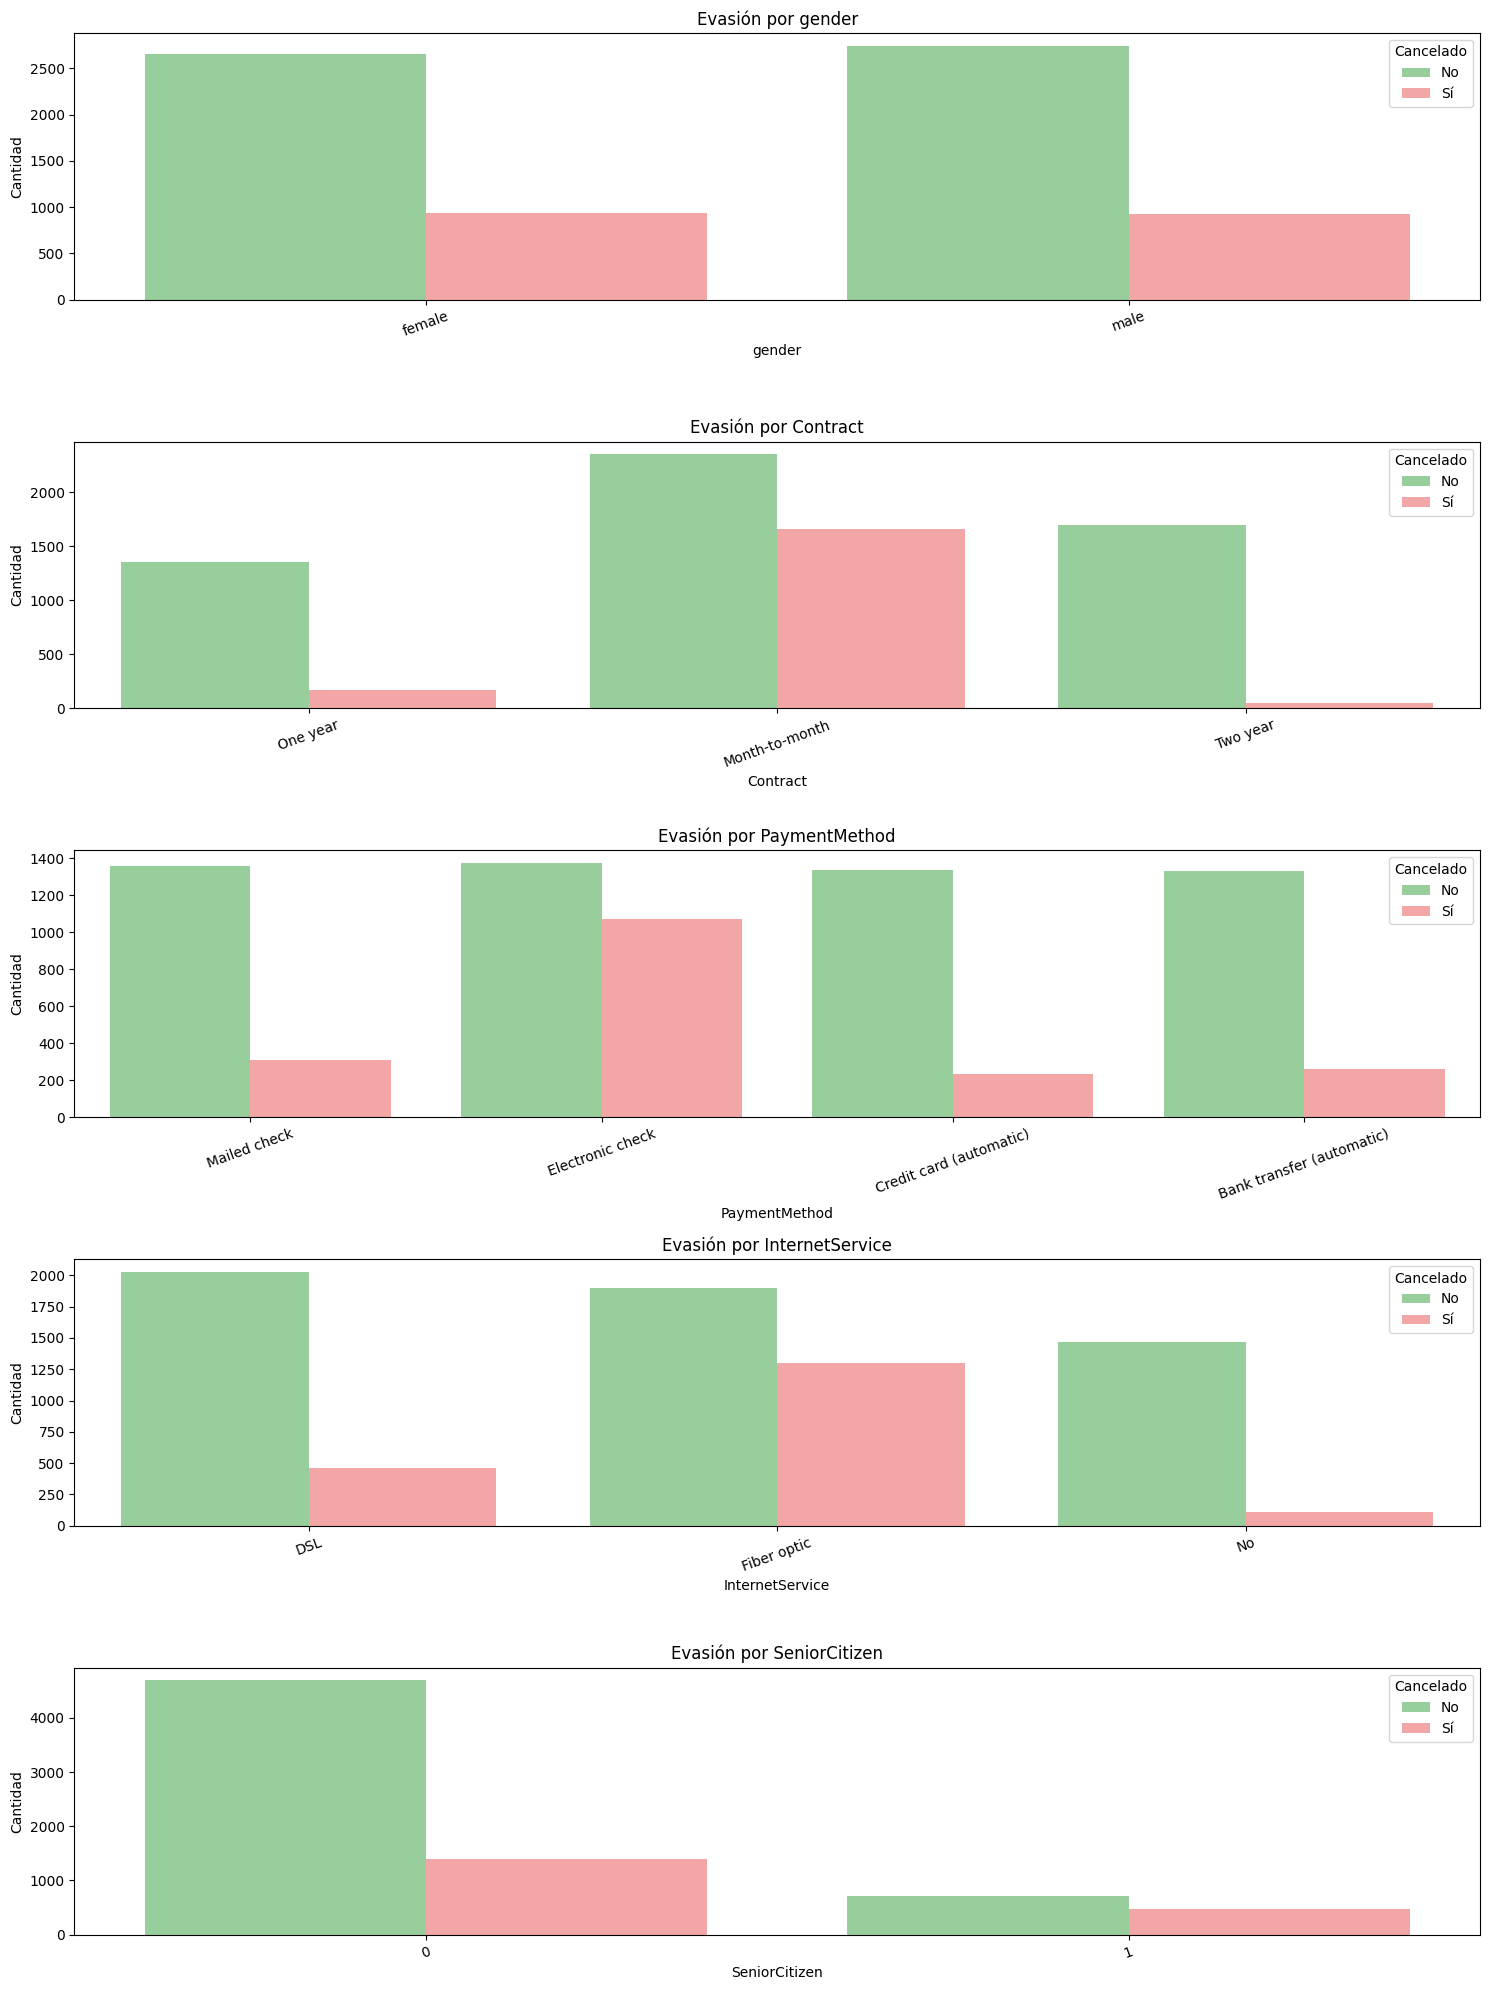

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables categóricas a analizar
categorical_vars = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'SeniorCitizen']

# Configurar el tamaño del gráfico
plt.figure(figsize=(15, 20))

# Crear un gráfico para cada variable
for i, var in enumerate(categorical_vars):
    plt.subplot(len(categorical_vars), 1, i+1)
    sns.countplot(data=df_final, x=var, hue='cancelled', palette={0: "#8fd694", 1: "#ff9999"})
    plt.title(f"Evasión por {var}")
    plt.xlabel(var)
    plt.ylabel("Cantidad")
    plt.legend(title='Cancelado', labels=['No', 'Sí'])
    plt.xticks(rotation=20)

plt.tight_layout()
plt.show()


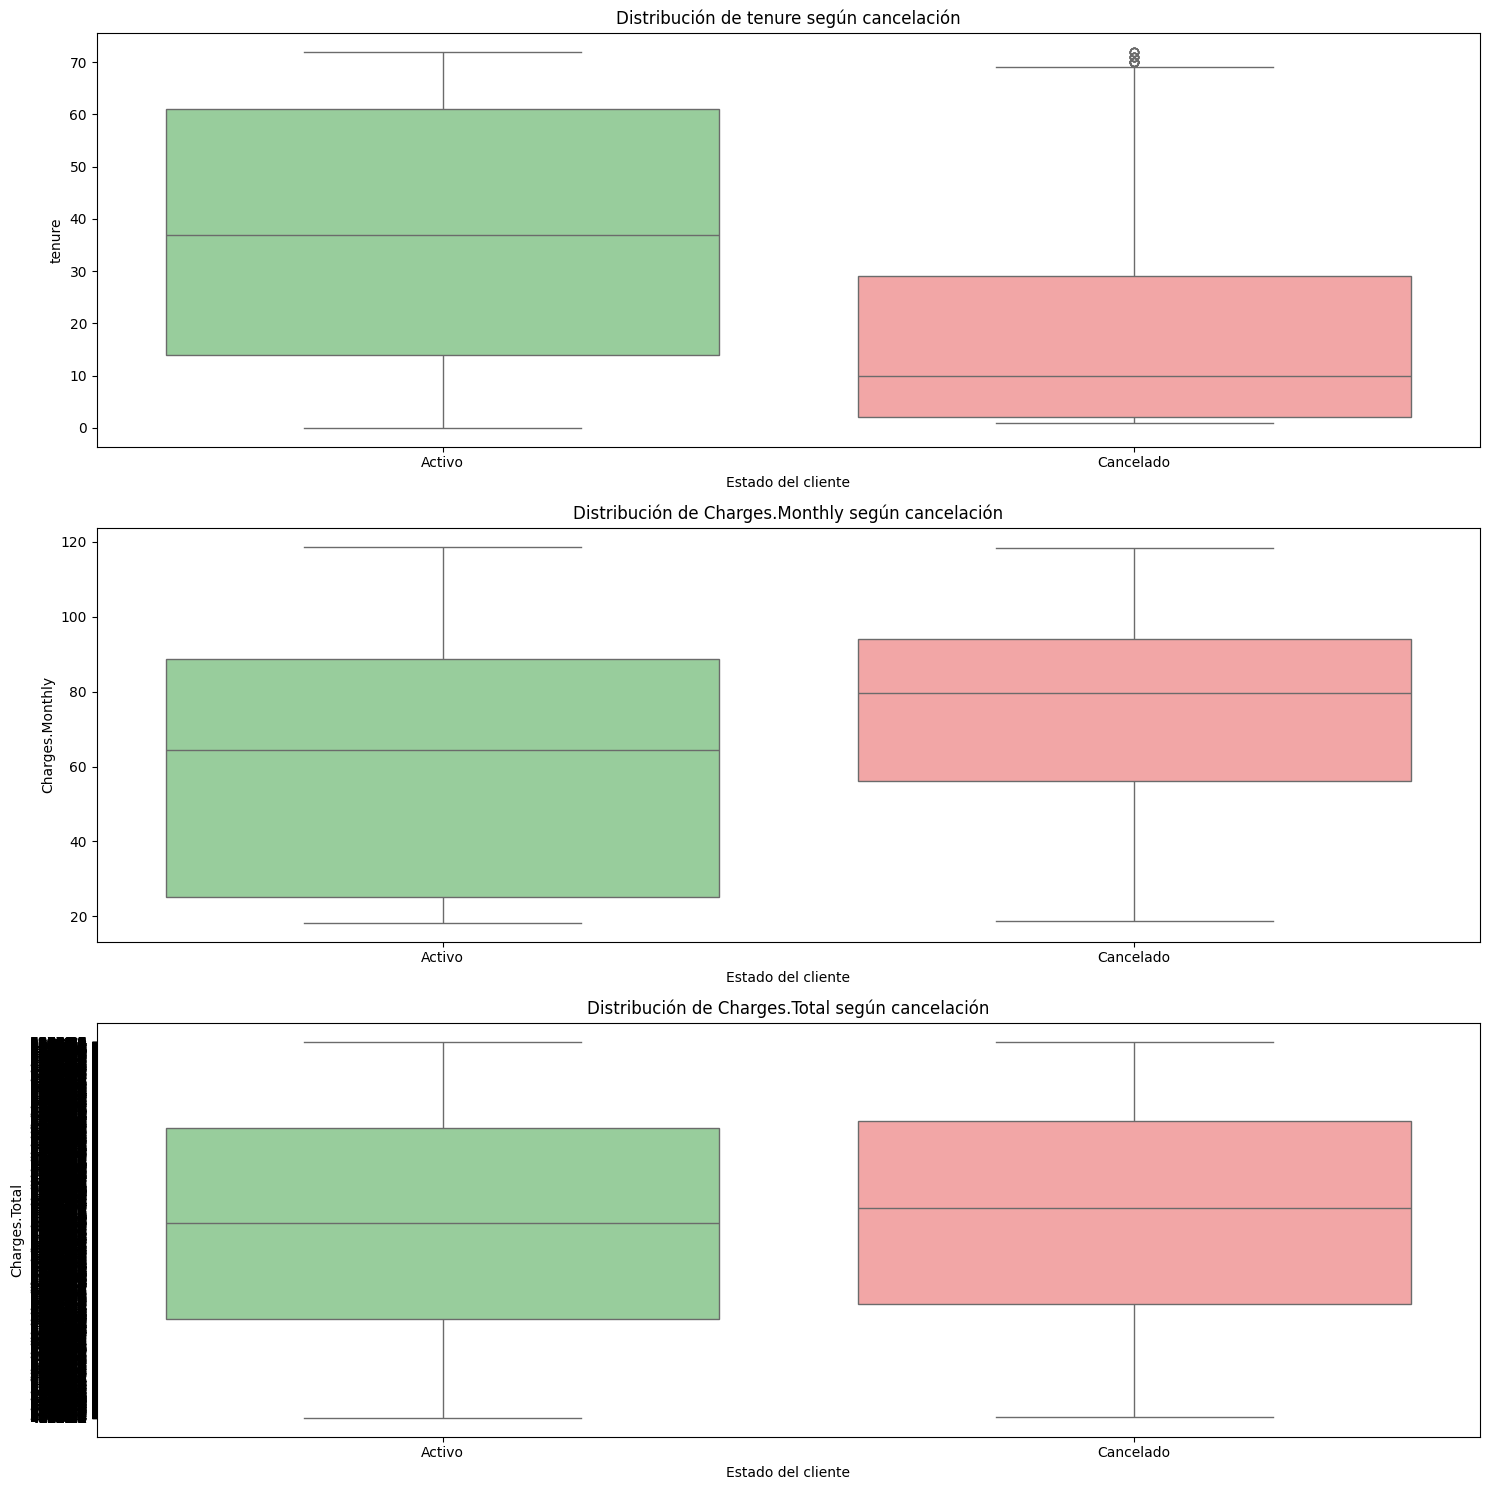

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear nueva columna de cuentas diarias
df_final['Cuentas_Diarias'] = df_final['Charges.Monthly'] / 30

# Lista de variables numéricas que deseas graficar
numeric_vars = ['tenure', 'Charges.Monthly', 'Charges.Total']  # Asegúrate de que existan en tu DataFrame

# Asegurar que 'cancelled_str' tenga dos categorías con nombres amigables
df_final['cancelled_str'] = df_final['cancelled'].replace({0: 'Activo', 1: 'Cancelado'})

# Paleta de colores personalizada
palette_colors = {'Activo': '#8fd694', 'Cancelado': '#ff9999'}

# Gráficos boxplot por variable numérica
plt.figure(figsize=(15, 15))

for i, var in enumerate(numeric_vars):
    plt.subplot(len(numeric_vars), 1, i+1)
    sns.boxplot(data=df_final, x='cancelled_str', y=var, hue='cancelled_str',
                palette=palette_colors, dodge=False, legend=False)
    plt.title(f'Distribución de {var} según cancelación')
    plt.xlabel('Estado del cliente')
    plt.ylabel(var)

plt.tight_layout()
plt.show()




Matriz de correlación:
                   tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias  \
tenure           1.000000         0.247982       0.825407         0.247982   
Charges.Monthly  0.247982         1.000000       0.652211         1.000000   
Charges.Total    0.825407         0.652211       1.000000         0.652211   
Cuentas_Diarias  0.247982         1.000000       0.652211         1.000000   
cancelled       -0.344079         0.189866      -0.193345         0.189866   

                 cancelled  
tenure           -0.344079  
Charges.Monthly   0.189866  
Charges.Total    -0.193345  
Cuentas_Diarias   0.189866  
cancelled         1.000000  


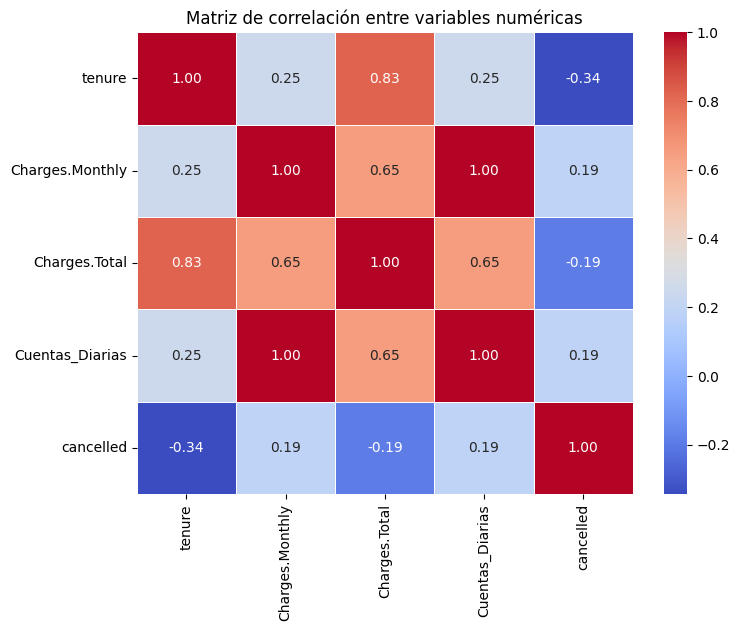

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for np.nan

# Variables numéricas relevantes
numeric_vars = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

# Ensure these columns are numeric, coercing errors to NaN
for col in numeric_vars:
    df_final[col] = pd.to_numeric(df_final[col], errors='coerce')

# Fill any resulting NaNs (for example, with 0 or the mean/median if appropriate)
# Here, we'll fill with 0 for simplicity, but consider the best approach based on your data characteristics
df_final[numeric_vars] = df_final[numeric_vars].fillna(0)

# Calculate the correlation matrix
correlation_matrix = df_final[numeric_vars + ['cancelled']].corr()

# Mostrar la matriz
print("Matriz de correlación:")
print(correlation_matrix)

# Visualización: Mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()

## **Informe** **Final – Análisis de Evasión de Clientes (Churn):**

# **1. Introducción**
El presente análisis tiene como objetivo comprender el comportamiento de los clientes en relación con la evasión del servicio (churn) en una empresa de telecomunicaciones. La evasión ocurre cuando un cliente decide cancelar el servicio, lo que representa una pérdida significativa para la empresa. A través del análisis exploratorio de los datos (EDA), se busca identificar patrones o factores clave que influyen en la cancelación del servicio, con el fin de proponer estrategias que mejoren la retención de clientes.



# **2. Limpieza y Tratamiento de Datos**
Se llevaron a cabo los siguientes pasos para preparar los datos para el análisis:

- Importación de datos desde el archivo CSV provisto.

- Inspección de valores nulos (NaN) y su tratamiento adecuado. Por ejemplo, se rellenaron con 0 o se convirtieron correctamente según el tipo de variable.

- Conversión de variables categóricas como cancelled a valores binarios (0 = no cancelado, 1 = cancelado) para facilitar el análisis.

- Transformación de variables numéricas a un formato adecuado, asegurando su correcta interpretación (como Charges.Total o tenure).



# **3. Análisis Exploratorio de Datos**
Se realizaron diferentes análisis y visualizaciones para explorar los datos:

**-  Distribución general del churn:**

Se generó un gráfico circular y un gráfico de barras para visualizar cuántos clientes se dieron de baja y cuántos continuaron con el servicio.

**- Churn por variables categóricas:**

Se analizaron variables como el género, tipo de contrato, método de pago y servicios contratados, revelando diferencias notables en los niveles de cancelación entre los distintos grupos.

**- Churn por variables numéricas:**

Se utilizaron gráficos de tipo boxplot para comparar variables como:

**- Tenure:**

Los clientes que se fueron suelen tener menor tiempo como usuarios.

**- Charges.Monthly:**

La evasión es más común en clientes con cargos mensuales más altos.

**- Charges.Total:**

Los clientes que se quedan tienden a haber gastado más en total, posiblemente por mayor permanencia.



### **3. Conclusiones e Insights**
- La evasión es más alta en clientes con contratos de corto plazo, especialmente de tipo mensual.

- Los clientes que pagan mediante métodos electrónicos muestran una leve tendencia a cancelar más que aquellos con pagos automáticos.

- Los clientes con menor antigüedad (tenure) presentan mayores tasas de cancelación.

- Algunos servicios, como soporte técnico o protección de dispositivos, están asociados con menor evasión, sugiriendo que el valor agregado podría influir en la retención.



# **4. Recomendaciones**
- Fomentar contratos de mayor duración, ofreciendo beneficios o descuentos por planes anuales.

- Implementar programas de fidelización enfocados en los primeros meses del cliente, que es cuando más se cancelan servicios.

- Promover el uso de servicios complementarios, como soporte técnico o protección de dispositivos.

- Segmentar campañas de retención dirigidas a los perfiles con mayor probabilidad de churn detectados en el análisis.

- Optimizar el monto del cargo mensual, evaluando si es posible ofrecer planes más competitivos sin reducir la calidad del servicio.

